In [1]:
!pip install fuzzywuzzy[speedup]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.7/162.7 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 22.4 MB/s eta 0:00:00


In [2]:
import spacy as scy
from google.colab import files
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Seleccionar y cargar un archivo desde tu computadora
uploaded = files.upload()

# Obtener el nombre del archivo cargado
file_name = list(uploaded.keys())[0]

# Realizar operaciones con el archivo cargado
# ...

# Eliminar el archivo cargado (opcional)
# files.remove(file_name)

Saving La_felicidad_de_los_tulueños - Encuesta_LA_FELICIDAD_DE_LOS_TULUEÑOS - 2024-11-19T16-04-08-0300 (1).csv to La_felicidad_de_los_tulueños - Encuesta_LA_FELICIDAD_DE_LOS_TULUEÑOS - 2024-11-19T16-04-08-0300 (1).csv


In [3]:
import pandas as pd

# Cargar el archivo
file_path = 'La_felicidad_de_los_tulueños - Encuesta_LA_FELICIDAD_DE_LOS_TULUEÑOS - 2024-11-19T16-04-08-0300 (1).csv'  # Cambia a la ruta de tu archivo subido en Colab
data_municipalidad_felicidad_tulueños = pd.read_csv(file_path)

# Separar la columna en dos utilizando delimitadores como coma, punto o guion
data_municipalidad_felicidad_tulueños[['Barrio', 'Mejora_barrio']] = data_municipalidad_felicidad_tulueños['¿En que barrio resides y que harías para mejorarlo?'].str.split(
    '[,.-]', expand=True, n=1)

# Limpiar espacios en blanco en las nuevas columnas
data_municipalidad_felicidad_tulueños['Barrio'] = data_municipalidad_felicidad_tulueños['Barrio'].str.strip()
data_municipalidad_felicidad_tulueños['Mejora_barrio'] = data_municipalidad_felicidad_tulueños['Mejora_barrio'].str.strip()

# Eliminar filas donde ambas columnas sean nulas
data_cleaned = data_municipalidad_felicidad_tulueños.dropna(subset=['Barrio', 'Mejora_barrio'], how='all')

# Guardar el archivo transformado en Excel
data_cleaned.to_excel('Respuestas_transformadas.xlsx', index=False)


In [4]:
data_cleaned.head()

,Registro,Dispositivo,Fecha de nacimiento,Género,¿Qué tan satisfecho está con su vida actualmente?,¿Hasta qué punto siente que las cosas que hace en su vida diaria valen la pena?,"<b>Pensando en tu bienestar emocional, ¿qué tan feliz o ansioso(a) te sentiste ayer?</b>",<b>¿Qué aspecto cambiarías en Tuluá para mejorar tu bienestar y el de los demás?</b>,¿Mejorarías algo en tu Barrio?,¿En que barrio resides y que harías para mejorarlo?,Duración,Barrio,Mejora_barrio
0,2024-11-19 15:21:59,phone,1966-05-21,female,6.0,NaN,Preocupada por la seguridad de mi ciudad,La seguridad es el mejor lugar para vivir pero...,SI,Villa campestre. Mucha pólvora en diciembre...,02:02,Villa campestre,Mucha pólvora en diciembre eso perturba la tr...
1,2024-11-19 11:17:08,phone,2001-07-31,male,7.0,9.0,Neutral,Más espacios de actividad deportiva gratuitas ...,SI,"Lusitania, actividades de integración con los ...",01:27,Lusitania,actividades de integración con los vecinos
2,2024-11-19 09:20:05,phone,1983-05-18,male,7.0,8.0,Neutral,"La seguridad, y la estabilidad económica",NO,"José Antonio galan, creo que mi barrio dentro ...",02:12,José Antonio galan,creo que mi barrio dentro de lo posible está b...
3,2024-11-19 08:58:51,phone,1977-02-22,female,7.0,8.0,Un poco ansioso,La seguridad y que generen empleo,SI,"Barrio popular, cooperar para mantener limpias...",02:16,Barrio popular,cooperar para mantener limpias sus calles y qu...
4,2024-11-19 08:47:55,phone,1975-04-27,female,8.0,8.0,Feliz,"Seguridad, empleo, recreación",SI,Panamericano parques o espacios verdes para c...,02:43,Panamericano parques o espacios verdes para c...,None


In [5]:
# Reiniciar el índice del DataFrame y eliminar el índice anterior
data_cleaned.reset_index(drop=True, inplace=True)
data_cleaned

,Registro,Dispositivo,Fecha de nacimiento,Género,¿Qué tan satisfecho está con su vida actualmente?,¿Hasta qué punto siente que las cosas que hace en su vida diaria valen la pena?,"<b>Pensando en tu bienestar emocional, ¿qué tan feliz o ansioso(a) te sentiste ayer?</b>",<b>¿Qué aspecto cambiarías en Tuluá para mejorar tu bienestar y el de los demás?</b>,¿Mejorarías algo en tu Barrio?,¿En que barrio resides y que harías para mejorarlo?,Duración,Barrio,Mejora_barrio
0,2024-11-19 15:21:59,phone,1966-05-21,female,6.0,NaN,Preocupada por la seguridad de mi ciudad,La seguridad es el mejor lugar para vivir pero...,SI,Villa campestre. Mucha pólvora en diciembre...,02:02,Villa campestre,Mucha pólvora en diciembre eso perturba la tr...
1,2024-11-19 11:17:08,phone,2001-07-31,male,7.0,9.0,Neutral,Más espacios de actividad deportiva gratuitas ...,SI,"Lusitania, actividades de integración con los ...",01:27,Lusitania,actividades de integración con los vecinos
2,2024-11-19 09:20:05,phone,1983-05-18,male,7.0,8.0,Neutral,"La seguridad, y la estabilidad económica",NO,"José Antonio galan, creo que mi barrio dentro ...",02:12,José Antonio galan,creo que mi barrio dentro de lo posible está b...
3,2024-11-19 08:58:51,phone,1977-02-22,female,7.0,8.0,Un poco ansioso,La seguridad y que generen empleo,SI,"Barrio popular, cooperar para mantener limpias...",02:16,Barrio popular,cooperar para mantener limpias sus calles y qu...
4,2024-11-19 08:47:55,phone,1975-04-27,female,8.0,8.0,Feliz,"Seguridad, empleo, recreación",SI,Panamericano parques o espacios verdes para c...,02:43,Panamericano parques o espacios verdes para c...,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
798,2024-12-22 20:39:45,teléfono,1973-04-28,female,NaN,10.0,Muy Feliz,Me encanta tulua,SI,La seguridades,01:10,La seguridades,None
799,2024-12-22 20:28:43,teléfono,1942-05-06,male,10.0,8.0,Feliz,"Mejorar la seguridad con investiga cion, más a...",SI,Barrio Tomas Uribe Uribe solicitaría Secretari...,21:06,Barrio Tomas Uribe Uribe solicitaría Secretari...,None
800,2024-12-22 23:17:09,teléfono,1985-01-15,female,7.0,8.0,Muy ansioso,"Espacios de fortalecimiento emocional, sano us...",SI,Las nieves,01:26,Las nieves,None
801,2024-12-22 23:28:53,teléfono,1979-01-27,female,2.0,1.0,Temo por mi vida,Que la alcaldía colabore más a la zona rural p...,SI,Corregimiento de Nariño me encantaría tener pr...,05:20,Corregimiento de Nariño me encantaría tener pr...,None


In [6]:
import pandas as pd
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

# Lista de barrios específicos a preservar
barrios_especificos = [
    "Ciudad Campestre", "El Retiro", "Fátima", "Urbanización Lomitas", "El Jazmín", "Miraflores",
    "Panamericano", "La Rivera", "San Benito", "Victoria", "Villa Campestre", "Villa del Río",
    "Alvernia", "Céspedes", "Entre Ríos", "Franciscanos", "Nuevo Alvernia", "San Vicente de Paúl",
    "Urbanización Santa Lucía", "Asoagrin", "La Santa Cruz", "Casa Huertas", "El Bosque", "El Cóndor I y II",
    "El Dorado", "Estambul", "La Inmaculada", "La Villa", "Las Brisas", "Morales", "Nuevo Morales",
    "Moralito", "Popular", "San Antonio", "Santa Rita del Río", "Urbanización Peñaranda", "Villanueva",
    "Asociación de Vivienda Los Pinos", "Nuevo Morales", "El Centro", "Escobar", "Las Olas", "Palobonito",
    "Tomás Uribe Uribe", "Avenida Cali", "Conjunto Residencial Lusitania", "Doce de Octubre", "El Lago",
    "El Laguito", "El Príncipe", "Nuevo Príncipe", "Principito", "La Bastilla", "La Merced", "Las Acacias",
    "Lusitania", "Sajonia", "Salesiano", "San Carlos", "Quintas de San Felipe", "Bolívar", "Playas",
    "Marandúa", "Pueblo Nuevo", "Asoagrin - Farfán", "La Ceiba", "La Esperanza", "Comuneros",
    "Corazón del Valle", "Buenos Aires", "Primero de Mayo", "Las Delicias", "350 Años", "El Pinar",
    "Progresar", "San Pedro Claver", "La Herradura", "Ciudad Las Palmas", "Departamental", "El Porvenir",
    "Farfán", "La Quinta", "Las Américas", "Los Tolúes", "Rojas", "Diablos Rojos", "El Descanso",
    "El Limonar", "Guayacanes", "José Antonio Galán", "Juan de Lemus y Aguirre", "La Campiña",
    "Las Nieves", "Las Veraneras", "San Marino", "Laureles I y II", "Nuevo Farfán", "Los Olmos",
    "Prados del Norte", "Rubén Cruz Vélez", "Villa del Lago", "Villa Liliana", "Villa del Sur",
    "Chiminangos", "Municipal", "Bello Horizonte", "Bosques de Maracaibo", "Comfamiliar",
    "Americana de Vivienda (Diablos Rojos II)", "El Refugio", "Flor de la Campana", "Horizonte",
    "Santa Isabel", "Jorge Eliecer Gaitán", "La Independencia", "El Limonar", "Río Paila", "San Luis",
    "Santa Inés de Comfamiliar", "Sintra SanCarlos", "Tercer Milenio", "Alameda I y II", "El Jardín",
    "El Palmar", "La Graciela", "La Trinidad", "Siete de Agosto", "Villa Colombia", "Internacional",
    "Juan XXIII", "El Bosquecito", "Maracaibo", "Río Paila", "Portales del Río", "Samán del Norte",
    "Aguaclara", "La Paz", "El Paraíso"
]

# Función para limpiar y comparar nombres de barrios
def obtener_barrio_mejora(texto):
    if pd.isnull(texto):
        return pd.Series([None, None])

    # Eliminar palabras irrelevantes como "barrio"
    texto = texto.lower().replace("barrio", "").strip()

    # Buscar coincidencia aproximada del barrio
    mejor_coincidencia, score = process.extractOne(texto, barrios_especificos, scorer=fuzz.partial_ratio)

    # Si el puntaje de coincidencia es alto, lo consideramos el barrio, el resto es mejora
    if score > 80:  # Ajustable según precisión deseada
        mejora = texto[len(mejor_coincidencia.lower()):].strip(" ,.-")
        return pd.Series([mejor_coincidencia, mejora])

    # Si no se encuentra coincidencia suficiente, devolvemos el texto en mejora
    return pd.Series([None, texto])

# Aplicar la función a la columna original
data_municipalidad_felicidad_tulueños[['Barrio', 'Mejora_barrio']] = data_municipalidad_felicidad_tulueños['¿En que barrio resides y que harías para mejorarlo?'].apply(obtener_barrio_mejora)

# Eliminar filas donde ambas columnas resultantes sean nulas
data_cleaned = data_municipalidad_felicidad_tulueños.dropna(subset=['Barrio', 'Mejora_barrio'], how='all')

# Reiniciar el índice del DataFrame limpio
data_cleaned.reset_index(drop=True, inplace=True)

# Visualizar los primeros resultados para confirmar que todo funciona correctamente
data_cleaned[['Barrio', 'Mejora_barrio']].head()


,Barrio,Mejora_barrio
0,Villa Campestre,mucha pólvora en diciembre eso perturba la tr...
1,Lusitania,actividades de integración con los vecinos
2,José Antonio Galán,creo que mi dentro de lo posible está bien
3,Popular,cooperar para mantener limpias sus calles y qu...
4,Panamericano,parques o espacios verdes para compartir


In [7]:
# Intentar agregar la columna de edades al conjunto de datos `data_cleaned` si estuviera disponible
from datetime import datetime

# Asegurarse de que la columna 'Fecha de nacimiento' esté en formato datetime en el dataset `data_cleaned`
data_cleaned['Fecha de nacimiento'] = pd.to_datetime(data_cleaned['Fecha de nacimiento'], errors='coerce')

# Calcular la edad en función de la fecha actual y agregarla al DataFrame
today = datetime.today()
data_cleaned['Edad'] = data_cleaned['Fecha de nacimiento'].apply(lambda dob: today.year - dob.year - ((today.month, today.day) < (dob.month, dob.day)) if pd.notnull(dob) else None)

# Mostrar las primeras filas con la nueva columna de Edad para verificar
data_cleaned[['Fecha de nacimiento', 'Edad']].head()


<ipython-input-7-0d7dfa78bed2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Fecha de nacimiento'] = pd.to_datetime(data_cleaned['Fecha de nacimiento'], errors='coerce')
<ipython-input-7-0d7dfa78bed2>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Edad'] = data_cleaned['Fecha de nacimiento'].apply(lambda dob: today.year - dob.year - ((today.month, today.day) < (dob.month, dob.day)) if pd.notnull(dob) else None)


,Fecha de nacimiento,Edad
0,1966-05-21,58
1,2001-07-31,23
2,1983-05-18,41
3,1977-02-22,47
4,1975-04-27,49


In [8]:
data_cleaned

,Registro,Dispositivo,Fecha de nacimiento,Género,¿Qué tan satisfecho está con su vida actualmente?,¿Hasta qué punto siente que las cosas que hace en su vida diaria valen la pena?,"<b>Pensando en tu bienestar emocional, ¿qué tan feliz o ansioso(a) te sentiste ayer?</b>",<b>¿Qué aspecto cambiarías en Tuluá para mejorar tu bienestar y el de los demás?</b>,¿Mejorarías algo en tu Barrio?,¿En que barrio resides y que harías para mejorarlo?,Duración,Barrio,Mejora_barrio,Edad
0,2024-11-19 15:21:59,phone,1966-05-21,female,6.0,NaN,Preocupada por la seguridad de mi ciudad,La seguridad es el mejor lugar para vivir pero...,SI,Villa campestre. Mucha pólvora en diciembre...,02:02,Villa Campestre,mucha pólvora en diciembre eso perturba la tr...,58
1,2024-11-19 11:17:08,phone,2001-07-31,male,7.0,9.0,Neutral,Más espacios de actividad deportiva gratuitas ...,SI,"Lusitania, actividades de integración con los ...",01:27,Lusitania,actividades de integración con los vecinos,23
2,2024-11-19 09:20:05,phone,1983-05-18,male,7.0,8.0,Neutral,"La seguridad, y la estabilidad económica",NO,"José Antonio galan, creo que mi barrio dentro ...",02:12,José Antonio Galán,creo que mi dentro de lo posible está bien,41
3,2024-11-19 08:58:51,phone,1977-02-22,female,7.0,8.0,Un poco ansioso,La seguridad y que generen empleo,SI,"Barrio popular, cooperar para mantener limpias...",02:16,Popular,cooperar para mantener limpias sus calles y qu...,47
4,2024-11-19 08:47:55,phone,1975-04-27,female,8.0,8.0,Feliz,"Seguridad, empleo, recreación",SI,Panamericano parques o espacios verdes para c...,02:43,Panamericano,parques o espacios verdes para compartir,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
798,2024-12-22 20:39:45,teléfono,1973-04-28,female,NaN,10.0,Muy Feliz,Me encanta tulua,SI,La seguridades,01:10,None,la seguridades,51
799,2024-12-22 20:28:43,teléfono,1942-05-06,male,10.0,8.0,Feliz,"Mejorar la seguridad con investiga cion, más a...",SI,Barrio Tomas Uribe Uribe solicitaría Secretari...,21:06,Tomás Uribe Uribe,solicitaría secretaria de gobierno colaboració...,82
800,2024-12-22 23:17:09,teléfono,1985-01-15,female,7.0,8.0,Muy ansioso,"Espacios de fortalecimiento emocional, sano us...",SI,Las nieves,01:26,Las Nieves,,40
801,2024-12-22 23:28:53,teléfono,1979-01-27,female,2.0,1.0,Temo por mi vida,Que la alcaldía colabore más a la zona rural p...,SI,Corregimiento de Nariño me encantaría tener pr...,05:20,None,corregimiento de nariño me encantaría tener pr...,46


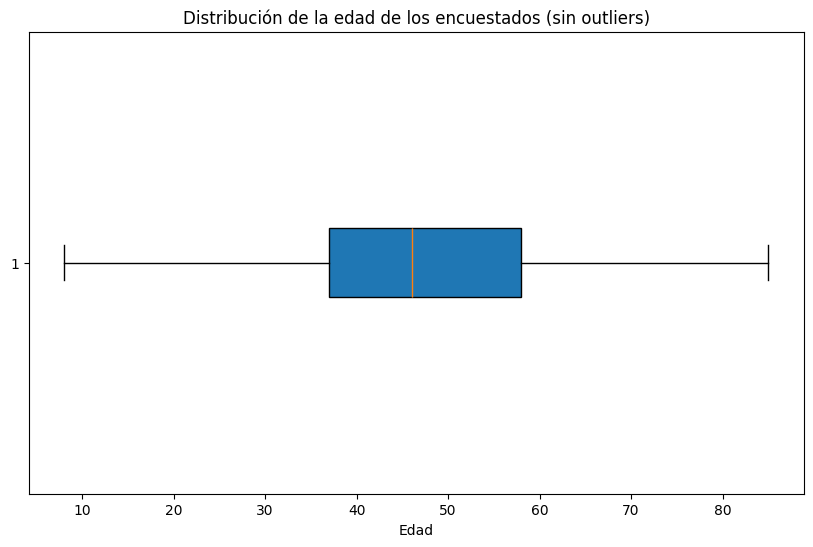

In [9]:
# Filtrar edades no nulas
edades = data_cleaned['Edad'].dropna()

# Calcular los límites para identificar outliers
Q1 = edades.quantile(0.25)
Q3 = edades.quantile(0.75)
IQR = Q3 - Q1

# Limites para detectar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar datos dentro de los límites
filtered_edades = edades[(edades >= lower_bound) & (edades <= upper_bound)]

# Visualización de la columna 'Edad del encuestado' sin outliers en forma de boxplot
fig, ax = plt.subplots(figsize=(10, 6))

# Generar boxplot sin outliers
ax.boxplot(filtered_edades, vert=False, patch_artist=True)
ax.set_title('Distribución de la edad de los encuestados (sin outliers)')
ax.set_xlabel('Edad')

plt.show()

In [10]:
# Diccionario con barrios y su comuna correspondiente
comunas_dict = {
    "Comuna 1": ["Ciudad Campestre", "El Retiro", "Fátima", "Urbanización Lomitas", "El Jazmín",
                 "Miraflores", "Panamericano", "La Rivera", "San Benito", "Victoria", "Villa Campestre",
                 "Villa del Río"],
    "Comuna 2": ["Alvernia", "Céspedes", "Entre Ríos", "Franciscanos", "Nuevo Alvernia", "San Vicente de Paúl",
                 "Urbanización Santa Lucía"],
    "Comuna 3": ["Asoagrin", "La Santa Cruz", "Casa Huertas", "El Bosque", "El Cóndor I y II", "El Dorado",
                 "Estambul", "La Inmaculada", "La Villa", "Las Brisas", "Morales", "Nuevo Morales",
                 "Moralito", "Popular", "San Antonio", "Santa Rita del Río", "Urbanización Peñaranda",
                 "Villanueva", "Asociación de Vivienda Los Pinos", "Nuevo Morales"],
    "Comuna 4": ["El Centro", "Escobar", "Las Olas", "Palobonito", "Tomás Uribe Uribe"],
    "Comuna 5": ["Avenida Cali", "Conjunto Residencial Lusitania", "Doce de Octubre", "El Lago", "El Laguito",
                 "El Príncipe", "Nuevo Príncipe", "Principito", "La Bastilla", "La Merced", "Las Acacias",
                 "Lusitania", "Sajonia", "Salesiano", "San Carlos", "Quintas de San Felipe"],
    "Comuna 6": ["Bolívar", "Playas", "Marandúa", "Pueblo Nuevo", "Asoagrin - Farfán", "La Ceiba",
                 "La Esperanza", "Comuneros", "Corazón del Valle", "Buenos Aires", "Primero de Mayo",
                 "Las Delicias", "350 Años", "El Pinar", "Progresar", "San Pedro Claver", "La Herradura",
                 "Ciudad Las Palmas"],
    "Comuna 7": ["Departamental", "El Porvenir", "Farfán", "La Quinta", "Las Américas", "Los Tolúes", "Rojas",
                 "Diablos Rojos", "El Descanso", "El Limonar", "Guayacanes", "José Antonio Galán",
                 "Juan de Lemus y Aguirre", "La Campiña", "Las Nieves", "Las Veraneras", "San Marino",
                 "Laureles I y II", "Nuevo Farfán", "Los Olmos", "Prados del Norte", "Rubén Cruz Vélez",
                 "Villa del Lago", "Villa Liliana", "Villa del Sur"],
    "Comuna 8": ["Chiminangos", "Municipal", "Bello Horizonte", "Bosques de Maracaibo", "Comfamiliar",
                 "Americana de Vivienda (Diablos Rojos II)", "El Refugio", "Flor de la Campana", "Horizonte",
                 "Santa Isabel", "Jorge Eliecer Gaitán", "La Independencia", "El Limonar", "Río Paila",
                 "San Luis", "Santa Inés de Comfamiliar", "Sintra SanCarlos", "Tercer Milenio"],
    "Comuna 9": ["Alameda I y II", "El Jardín", "El Palmar", "La Graciela", "La Trinidad", "Siete de Agosto",
                 "Villa Colombia", "Internacional", "Juan XXIII", "El Bosquecito", "Maracaibo", "Río Paila",
                 "Portales del Río", "Samán del Norte"],
    "Comuna 10": ["Aguaclara", "La Paz", "El Paraíso"]
}

# Crear una función para asignar la comuna basada en el barrio
def asignar_comuna(barrio):
    for comuna, barrios in comunas_dict.items():
        if barrio in barrios:
            return comuna
    return None  # Si el barrio no está en el diccionario, devolver None

# Aplicar la función a la columna 'Barrio' en `data_cleaned` para crear la columna 'Comuna'
data_cleaned['Comuna'] = data_cleaned['Barrio'].apply(asignar_comuna)

# Verificar las primeras filas para confirmar la nueva columna 'Comuna'
data_cleaned[['Barrio', 'Comuna']].head()


<ipython-input-10-03d200d29fa6>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Comuna'] = data_cleaned['Barrio'].apply(asignar_comuna)


,Barrio,Comuna
0,Villa Campestre,Comuna 1
1,Lusitania,Comuna 5
2,José Antonio Galán,Comuna 7
3,Popular,Comuna 3
4,Panamericano,Comuna 1


In [11]:
data_cleaned

,Registro,Dispositivo,Fecha de nacimiento,Género,¿Qué tan satisfecho está con su vida actualmente?,¿Hasta qué punto siente que las cosas que hace en su vida diaria valen la pena?,"<b>Pensando en tu bienestar emocional, ¿qué tan feliz o ansioso(a) te sentiste ayer?</b>",<b>¿Qué aspecto cambiarías en Tuluá para mejorar tu bienestar y el de los demás?</b>,¿Mejorarías algo en tu Barrio?,¿En que barrio resides y que harías para mejorarlo?,Duración,Barrio,Mejora_barrio,Edad,Comuna
0,2024-11-19 15:21:59,phone,1966-05-21,female,6.0,NaN,Preocupada por la seguridad de mi ciudad,La seguridad es el mejor lugar para vivir pero...,SI,Villa campestre. Mucha pólvora en diciembre...,02:02,Villa Campestre,mucha pólvora en diciembre eso perturba la tr...,58,Comuna 1
1,2024-11-19 11:17:08,phone,2001-07-31,male,7.0,9.0,Neutral,Más espacios de actividad deportiva gratuitas ...,SI,"Lusitania, actividades de integración con los ...",01:27,Lusitania,actividades de integración con los vecinos,23,Comuna 5
2,2024-11-19 09:20:05,phone,1983-05-18,male,7.0,8.0,Neutral,"La seguridad, y la estabilidad económica",NO,"José Antonio galan, creo que mi barrio dentro ...",02:12,José Antonio Galán,creo que mi dentro de lo posible está bien,41,Comuna 7
3,2024-11-19 08:58:51,phone,1977-02-22,female,7.0,8.0,Un poco ansioso,La seguridad y que generen empleo,SI,"Barrio popular, cooperar para mantener limpias...",02:16,Popular,cooperar para mantener limpias sus calles y qu...,47,Comuna 3
4,2024-11-19 08:47:55,phone,1975-04-27,female,8.0,8.0,Feliz,"Seguridad, empleo, recreación",SI,Panamericano parques o espacios verdes para c...,02:43,Panamericano,parques o espacios verdes para compartir,49,Comuna 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
798,2024-12-22 20:39:45,teléfono,1973-04-28,female,NaN,10.0,Muy Feliz,Me encanta tulua,SI,La seguridades,01:10,None,la seguridades,51,None
799,2024-12-22 20:28:43,teléfono,1942-05-06,male,10.0,8.0,Feliz,"Mejorar la seguridad con investiga cion, más a...",SI,Barrio Tomas Uribe Uribe solicitaría Secretari...,21:06,Tomás Uribe Uribe,solicitaría secretaria de gobierno colaboració...,82,Comuna 4
800,2024-12-22 23:17:09,teléfono,1985-01-15,female,7.0,8.0,Muy ansioso,"Espacios de fortalecimiento emocional, sano us...",SI,Las nieves,01:26,Las Nieves,,40,Comuna 7
801,2024-12-22 23:28:53,teléfono,1979-01-27,female,2.0,1.0,Temo por mi vida,Que la alcaldía colabore más a la zona rural p...,SI,Corregimiento de Nariño me encantaría tener pr...,05:20,None,corregimiento de nariño me encantaría tener pr...,46,None


In [12]:
import matplotlib.pyplot as plt
import pandas as pd

# Asegúrate de que data_cleaned contenga la información relevante
# Ejemplo: data_cleaned = pd.read_csv("tu_archivo.csv")

# Distribución por género
def plot_gender_distribution(data):
    gender_counts = data['Género'].value_counts()
    gender_counts.plot(kind='bar', color=['blue', 'pink'], edgecolor='black')
    plt.title('Distribución por Género')
    plt.xlabel('Género')
    plt.ylabel('Cantidad')
    plt.xticks(rotation=0)
    plt.show()




In [13]:
# Niveles de felicidad por género
def plot_happiness_by_gender(data):
    happiness_gender = data.groupby(['Género', '<b>Pensando en tu bienestar emocional, ¿qué tan feliz o ansioso(a) te sentiste ayer?</b>']).size()
    happiness_gender = happiness_gender.groupby(level=0).apply(lambda x: 100 * x / x.sum())

    for gender, group_data in happiness_gender.groupby(level=0):
        group_data.unstack().plot(kind='bar', stacked=True, figsize=(8, 6), edgecolor='black')
        plt.title(f'Niveles de Felicidad por Género: {gender}')
        plt.xlabel('Estado Emocional')
        plt.ylabel('Porcentaje')
        plt.xticks(rotation=45)
        plt.legend(title='Felicidad')
        plt.show()


In [14]:
# Propuestas por edades
def plot_proposals_by_age_group(data):
    bins = [0, 29, 59, 100]
    labels = ['Jóvenes (0-29)', 'Adultos (30-59)', 'Ancianos (60+)']
    data['Grupo_Edad'] = pd.cut(data['Edad'], bins=bins, labels=labels)

    proposals_by_age = data.groupby('Grupo_Edad')['<b>¿Qué aspecto cambiarías en Tuluá para mejorar tu bienestar y el de los demás?</b>'].apply(lambda x: x.value_counts().head(3))

    for age_group, proposals in proposals_by_age.groupby(level=0):
        proposals.plot(kind='bar', figsize=(10, 5), edgecolor='black')
        plt.title(f'Propuestas Principales: {age_group}')
        plt.xlabel('Propuestas')
        plt.ylabel('Frecuencia')
        plt.xticks(rotation=45)
        plt.show()

In [ ]:
# Llamar a las funciones con el DataFrame "data_cleaned"
plot_gender_distribution(data_cleaned)

In [ ]:
plot_happiness_by_gender(data_cleaned)

In [ ]:
plot_proposals_by_age_group(data_cleaned)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Asegúrate de que data_cleaned contenga la información relevante
# Ejemplo: data_cleaned = pd.read_csv("tu_archivo.csv")

# Distribución por género
def plot_gender_distribution(data):
    gender_counts = data['Género'].value_counts()
    gender_counts.plot(kind='bar', color=['blue', 'pink'], edgecolor='black')
    plt.title('Distribución por Género')
    plt.xlabel('Género')
    plt.ylabel('Cantidad')
    plt.xticks(rotation=0)
    plt.show()


In [ ]:
# Niveles de felicidad por género
def plot_happiness_by_gender(data):
    happiness_gender = data.groupby(['Género', '<b>Pensando en tu bienestar emocional, ¿qué tan feliz o ansioso(a) te sentiste ayer?</b>']).size()
    happiness_gender = happiness_gender.groupby(level=0).apply(lambda x: 100 * x / x.sum())

    for gender in happiness_gender.index.levels[0]:
        gender_data = happiness_gender[gender]
        gender_data.plot(kind='bar', figsize=(8, 6), edgecolor='black')
        plt.title(f'Niveles de Felicidad por Género: {gender}')
        plt.xlabel('Estado Emocional')
        plt.ylabel('Porcentaje')
        plt.xticks(rotation=45)
        plt.show()

In [ ]:
# Propuestas por edades
def plot_proposals_by_age_group(data):
    bins = [0, 29, 59, 100]
    labels = ['Jóvenes (0-29)', 'Adultos (30-59)', 'Ancianos (60+)']
    data['Grupo_Edad'] = pd.cut(data['Edad'], bins=bins, labels=labels)

    for group in labels:
        group_data = data[data['Grupo_Edad'] == group]
        proposals = group_data['<b>¿Qué aspecto cambiarías en Tuluá para mejorar tu bienestar y el de los demás?</b>']
        proposal_counts = proposals.value_counts().head(5)

        proposal_counts.plot(kind='bar', figsize=(10, 5), edgecolor='black')
        plt.title(f'Propuestas Principales: {group}')
        plt.xlabel('Propuestas')
        plt.ylabel('Frecuencia')
        plt.xticks(rotation=45)
        plt.show()


In [ ]:
# Llamar a las funciones con el DataFrame "data_cleaned"
plot_gender_distribution(data_cleaned)

In [ ]:
plot_happiness_by_gender(data_cleaned)

In [ ]:
plot_proposals_by_age_group(data_cleaned)

In [17]:
# Suponiendo que data_cleaned ya está cargado y contiene los datos de la Comuna 8
# Si no, se debería cargar antes de ejecutar las funciones

# Función para graficar la distribución por género
def plot_gender_distribution(data):
    gender_counts = data['Género'].value_counts()
    gender_counts.plot(kind='bar', color=['blue', 'pink'], edgecolor='black')
    plt.title('Distribución por Género - Comuna 8')
    plt.xlabel('Género')
    plt.ylabel('Cantidad')
    plt.xticks(rotation=0)
    plt.show()


In [18]:
# Función para graficar los niveles de felicidad por género
def plot_happiness_by_gender(data):
    happiness_gender = data.groupby(['Género', "<b>Pensando en tu bienestar emocional, ¿qué tan feliz o ansioso(a) te sentiste ayer?</b>"]).size()
    happiness_gender = happiness_gender.groupby(level=0).apply(lambda x: 100 * x / x.sum())

    for gender, group_data in happiness_gender.groupby(level=0):
        group_data.unstack().plot(kind='bar', stacked=True, figsize=(8, 6), edgecolor='black')
        plt.title(f'Niveles de Felicidad por Género - {gender} (Comuna 8)')
        plt.xlabel('Estado Emocional')
        plt.ylabel('Porcentaje')
        plt.xticks(rotation=45)
        plt.legend(title='Felicidad')
        plt.show()

In [19]:
# Función para graficar las propuestas por grupo de edad
def plot_proposals_by_age_group(data):
    bins = [0, 29, 59, 100]
    labels = ['Jóvenes (0-29)', 'Adultos (30-59)', 'Ancianos (60+)']
    data['Grupo_Edad'] = pd.cut(data['Edad'], bins=bins, labels=labels)

    proposals_by_age = data.groupby('Grupo_Edad')["<b>¿Qué aspecto cambiarías en Tuluá para mejorar tu bienestar y el de los demás?</b>"].apply(lambda x: x.value_counts().head(3))

    for age_group, proposals in proposals_by_age.groupby(level=0):
        proposals.plot(kind='bar', figsize=(10, 5), edgecolor='black')
        plt.title(f'Propuestas Principales - {age_group} (Comuna 8)')
        plt.xlabel('Propuestas')
        plt.ylabel('Frecuencia')
        plt.xticks(rotation=45)
        plt.show()

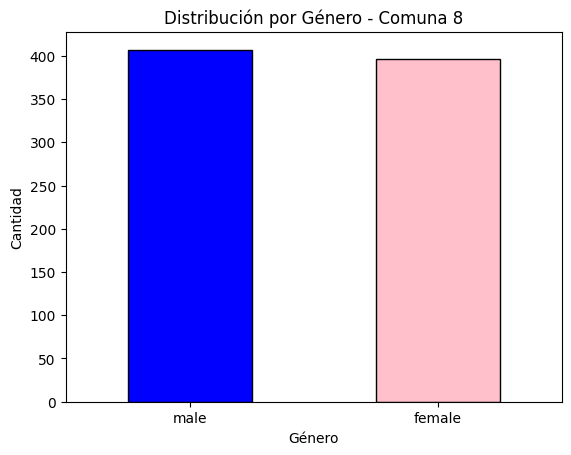

In [20]:
plot_gender_distribution(data_cleaned)

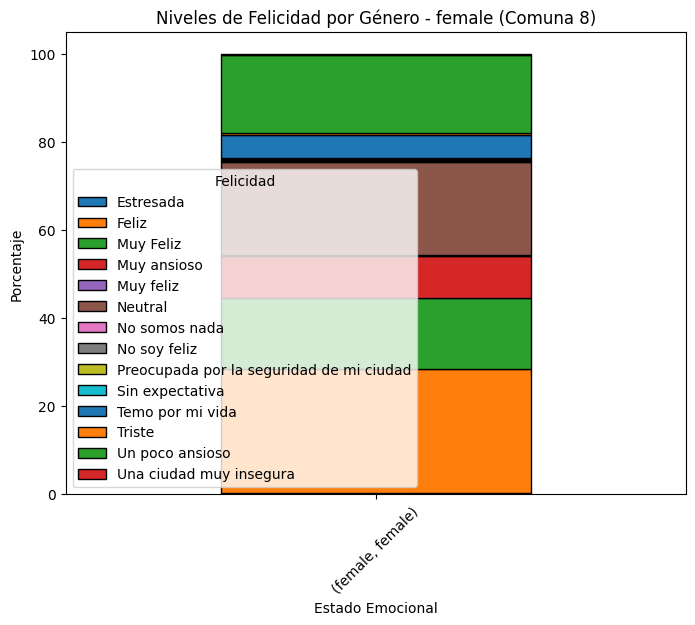

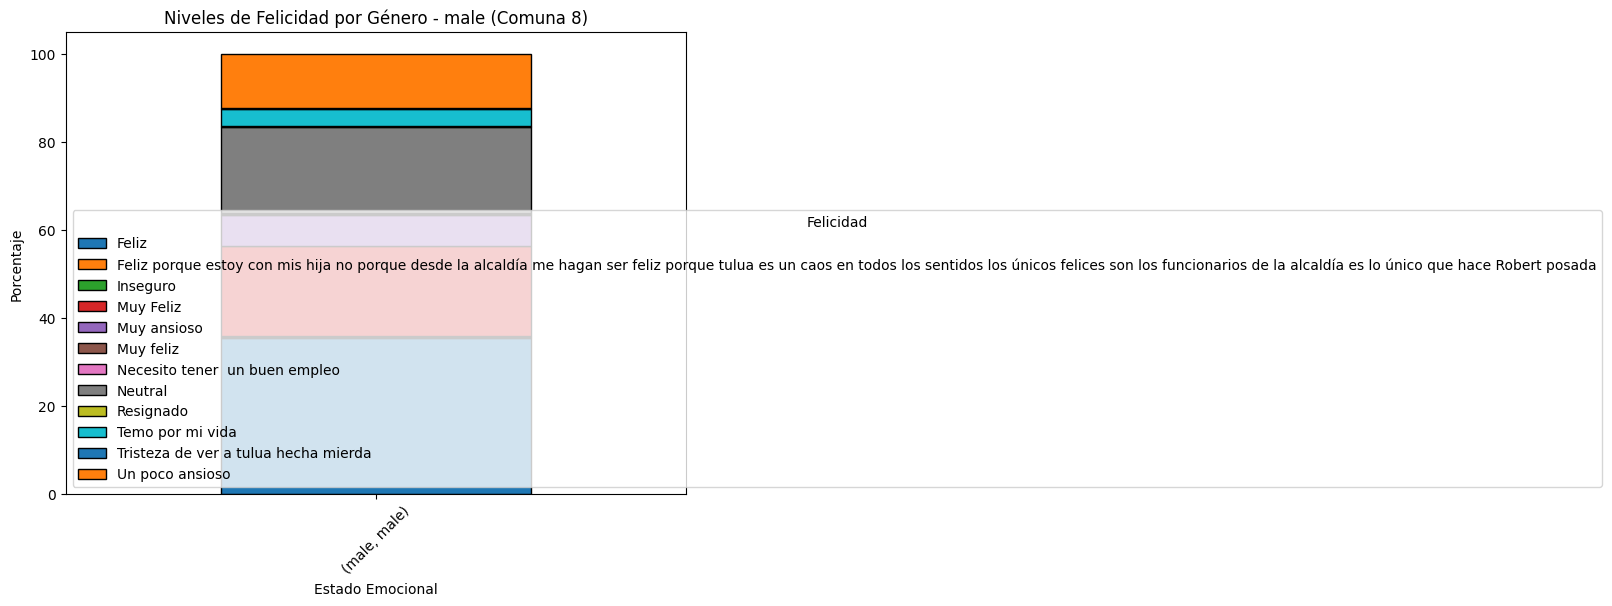

In [21]:
plot_happiness_by_gender(data_cleaned)

<ipython-input-19-9f288c79d7b4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Grupo_Edad'] = pd.cut(data['Edad'], bins=bins, labels=labels)
<ipython-input-19-9f288c79d7b4>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  proposals_by_age = data.groupby('Grupo_Edad')["<b>¿Qué aspecto cambiarías en Tuluá para mejorar tu bienestar y el de los demás?</b>"].apply(lambda x: x.value_counts().head(3))
<ipython-input-19-9f288c79d7b4>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass 

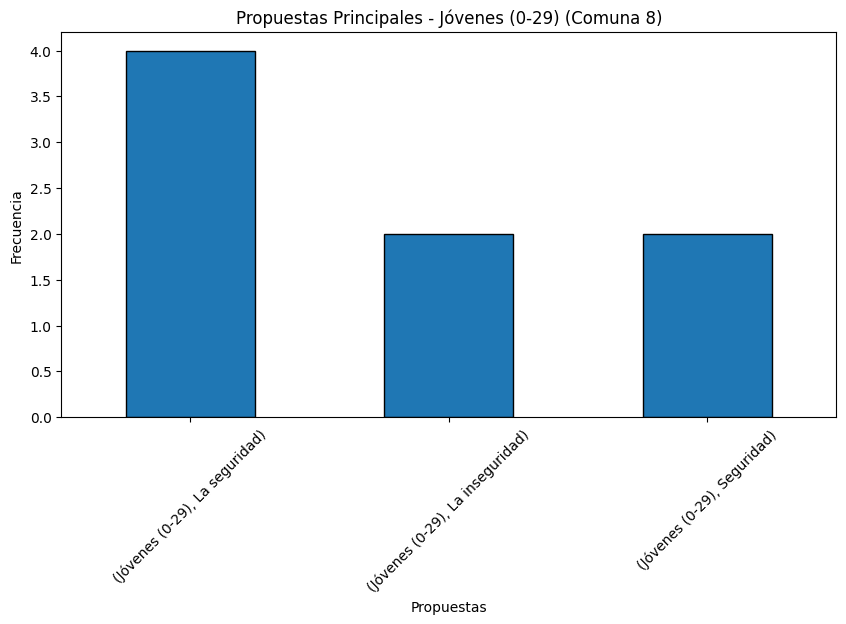

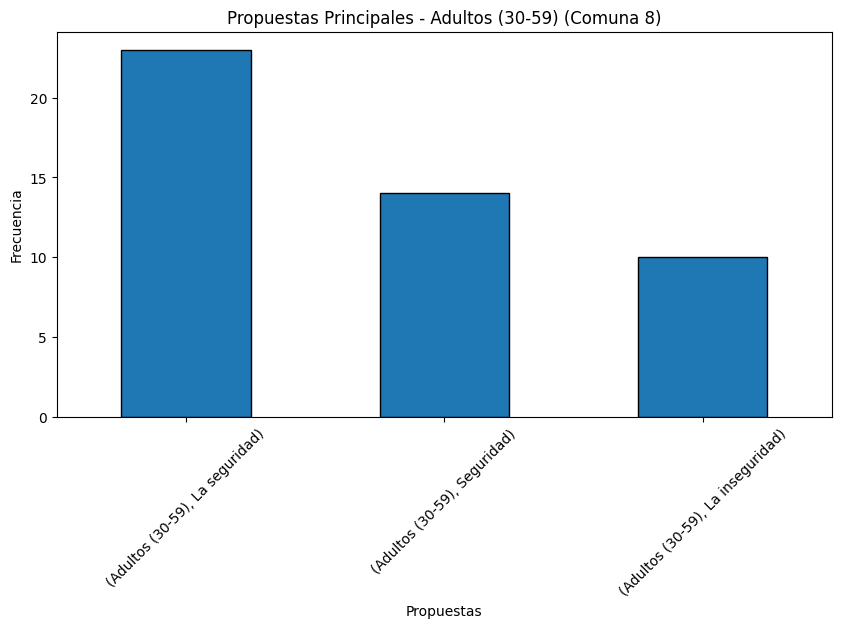

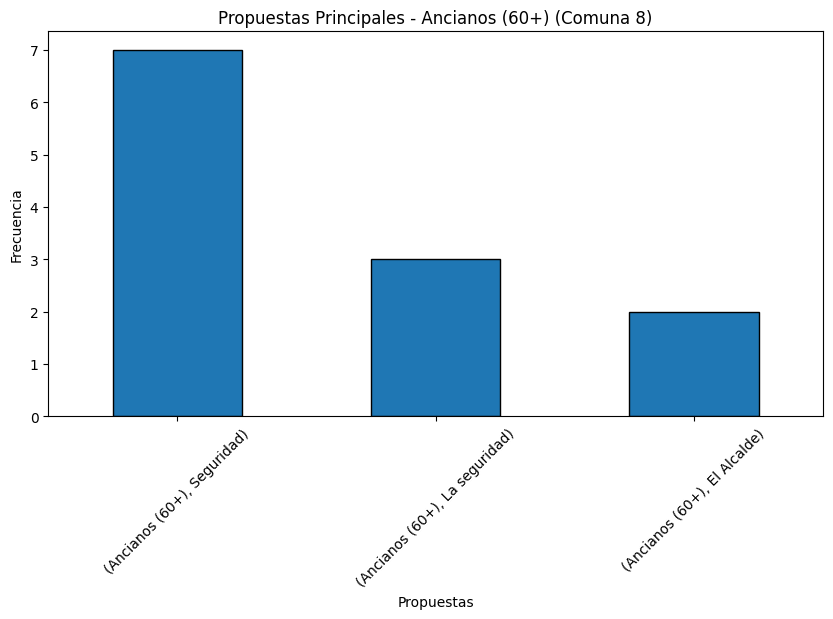

In [22]:
plot_proposals_by_age_group(data_cleaned)

In [44]:
# Asegurar que "data_cleaned" está disponible y contiene los datos de la Comuna 10
# Filtrar los datos solo para la Comuna 10
data_comuna_7 = data_cleaned[data_cleaned["Comuna"] == "Comuna 7"].copy()

# Función para graficar la distribución por género
def plot_gender_distribution(data):
    gender_counts = data['Género'].value_counts()
    gender_counts.plot(kind='bar', color=['blue', 'pink'], edgecolor='black')
    plt.title('Distribución por Género - Comuna 7')
    plt.xlabel('Género')
    plt.ylabel('Cantidad')
    plt.xticks(rotation=0)
    plt.show()


In [37]:
# Función para graficar los niveles de felicidad por género
def plot_happiness_by_gender(data):
    happiness_gender = data.groupby(['Género', "<b>Pensando en tu bienestar emocional, ¿qué tan feliz o ansioso(a) te sentiste ayer?</b>"]).size()
    happiness_gender = happiness_gender.groupby(level=0).apply(lambda x: 100 * x / x.sum())

    for gender, group_data in happiness_gender.groupby(level=0):
        group_data.unstack().plot(kind='bar', stacked=True, figsize=(8, 6), edgecolor='black')
        plt.title(f'Niveles de Felicidad por Género - {gender} (Comuna 7)')
        plt.xlabel('Estado Emocional')
        plt.ylabel('Porcentaje')
        plt.xticks(rotation=45)
        plt.legend(title='Felicidad')
        plt.show()

In [40]:

# Función para graficar las propuestas por grupo de edad
def plot_proposals_by_age_group(data):
    bins = [0, 29, 59, 100]
    labels = ['Jóvenes (0-29)', 'Adultos (30-59)', 'Ancianos (60+)']
    data['Grupo_Edad'] = pd.cut(data['Edad'], bins=bins, labels=labels)

    proposals_by_age = data.groupby('Grupo_Edad')["<b>¿Qué aspecto cambiarías en Tuluá para mejorar tu bienestar y el de los demás?</b>"].apply(lambda x: x.value_counts().head(3))

    for age_group, proposals in proposals_by_age.groupby(level=0):
        proposals.plot(kind='bar', figsize=(10, 5), edgecolor='black')
        plt.title(f'Propuestas Principales - {age_group} (Comuna 10)')
        plt.xlabel('Propuestas')
        plt.ylabel('Frecuencia')
        plt.xticks(rotation=45)
        plt.show()

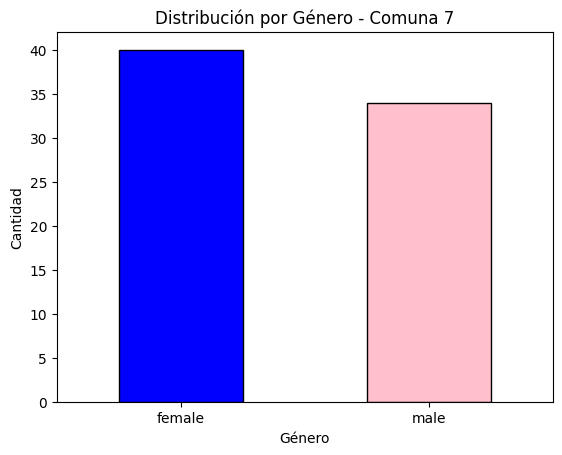

In [45]:
# Generar las gráficas para la Comuna 10
plot_gender_distribution(data_comuna_7)

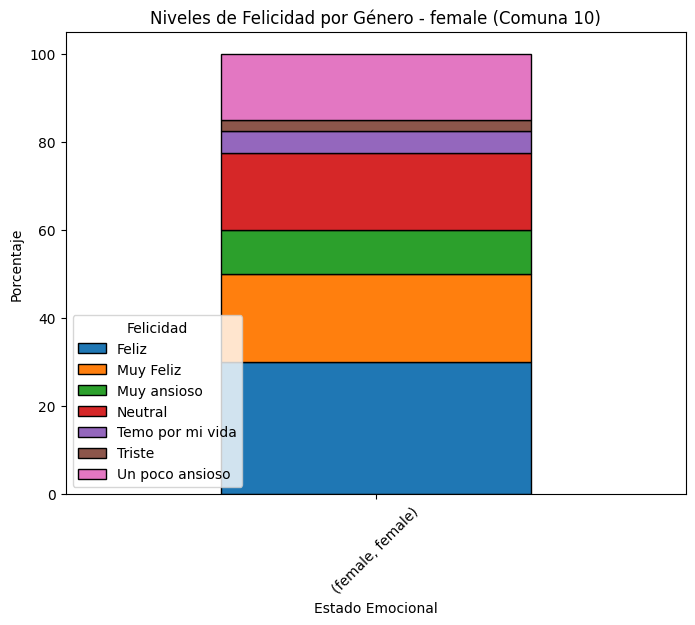

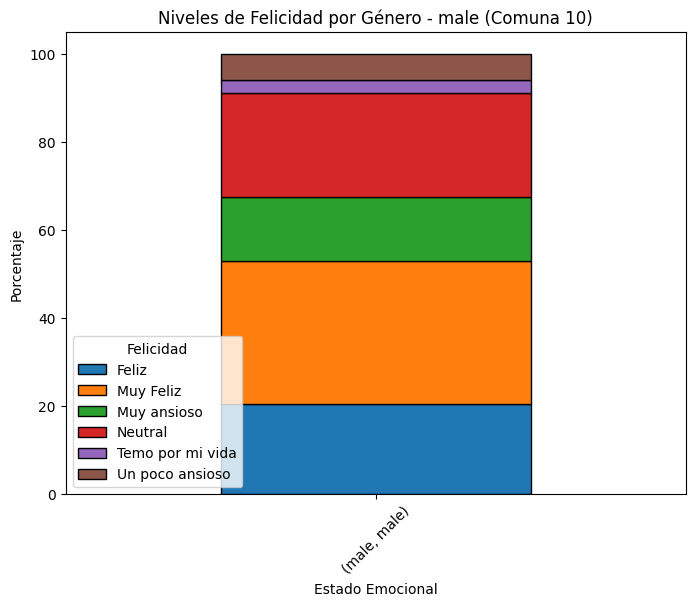

In [46]:
plot_happiness_by_gender(data_comuna_7)

<ipython-input-40-7876e064dfa9>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  proposals_by_age = data.groupby('Grupo_Edad')["<b>¿Qué aspecto cambiarías en Tuluá para mejorar tu bienestar y el de los demás?</b>"].apply(lambda x: x.value_counts().head(3))
<ipython-input-40-7876e064dfa9>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for age_group, proposals in proposals_by_age.groupby(level=0):


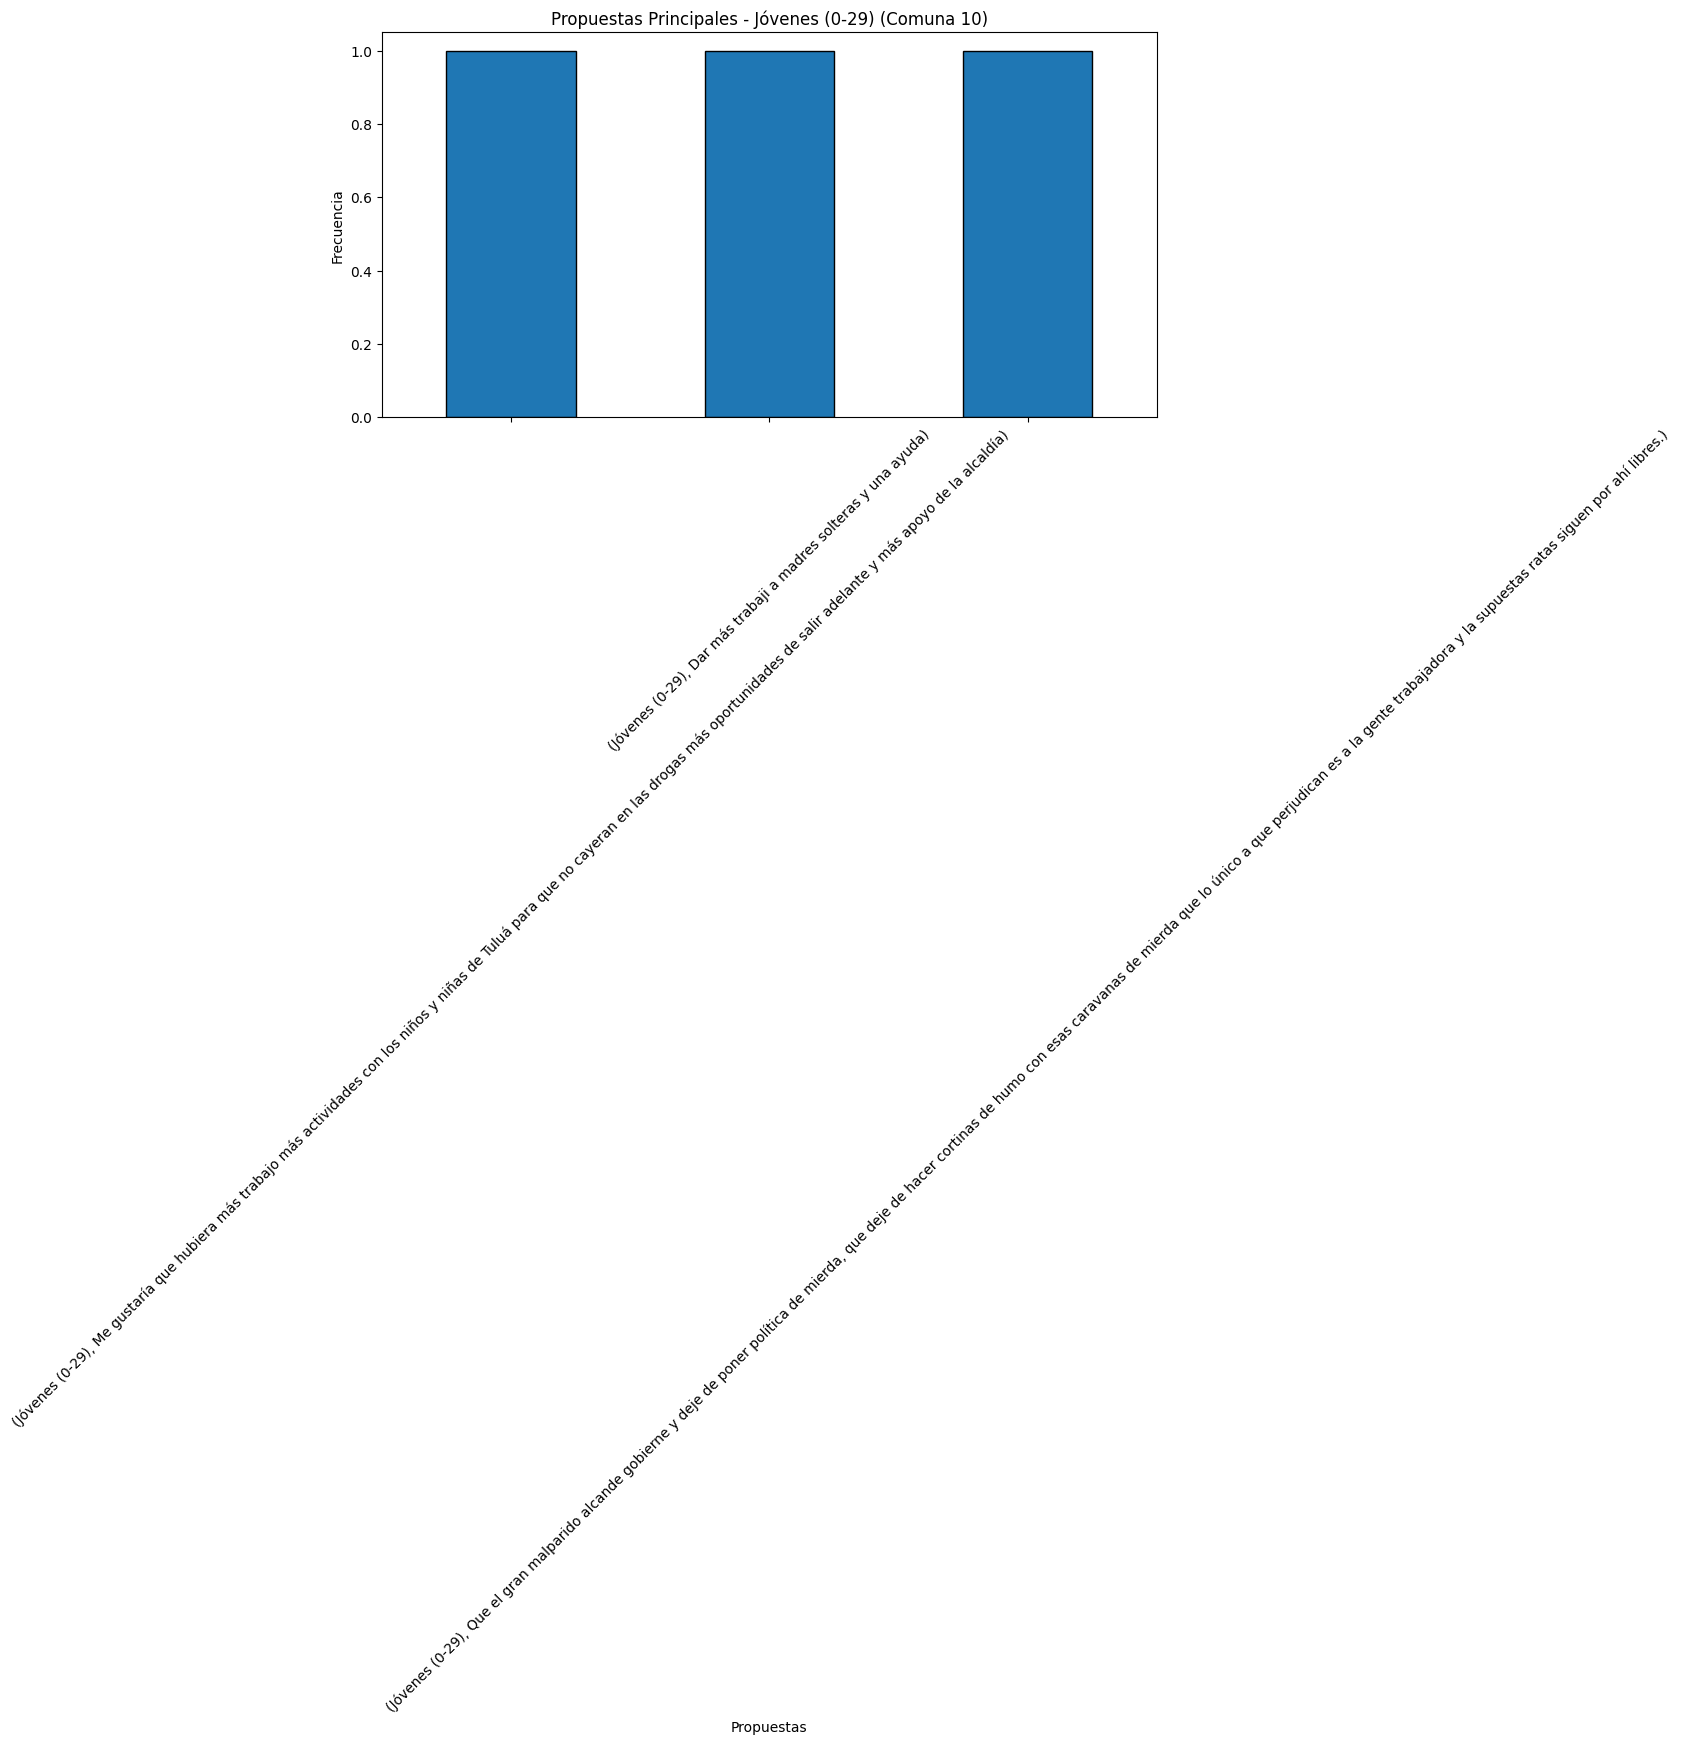

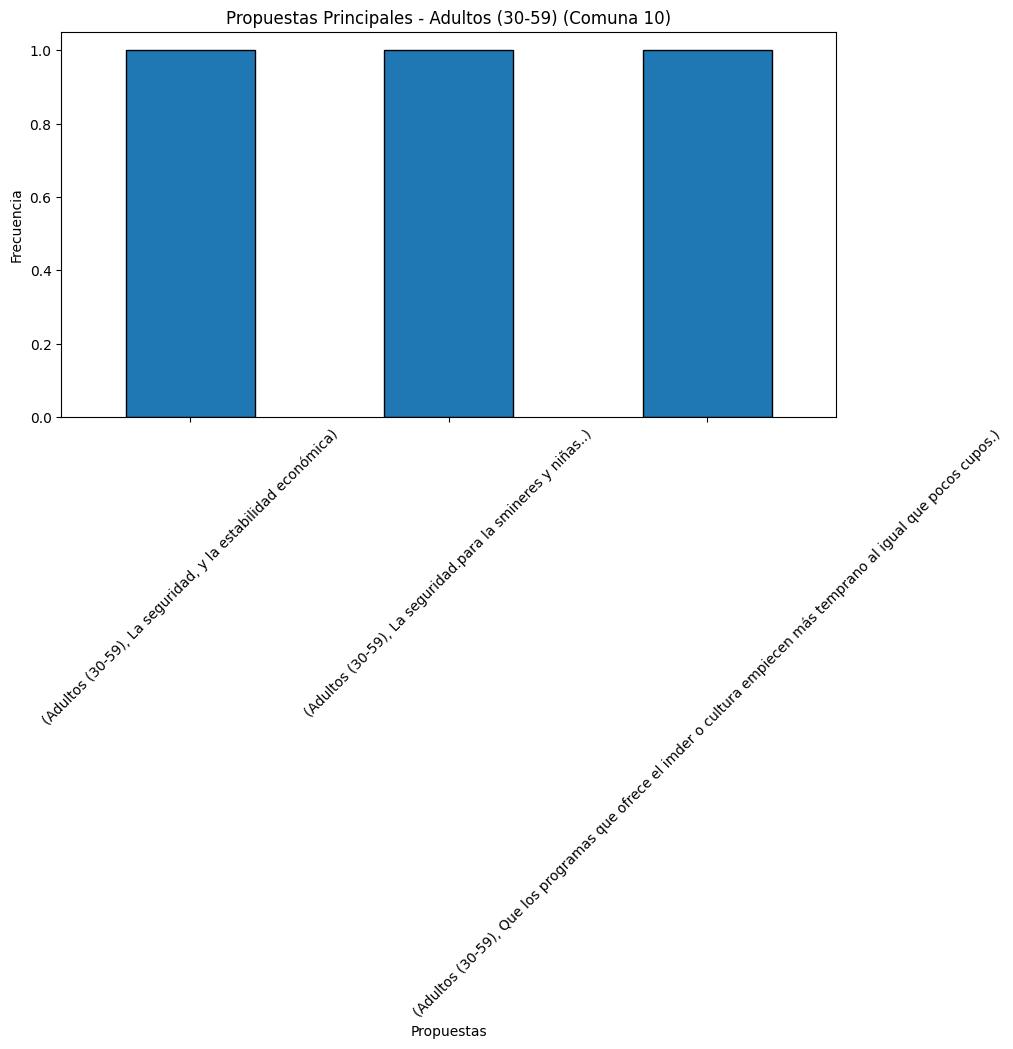

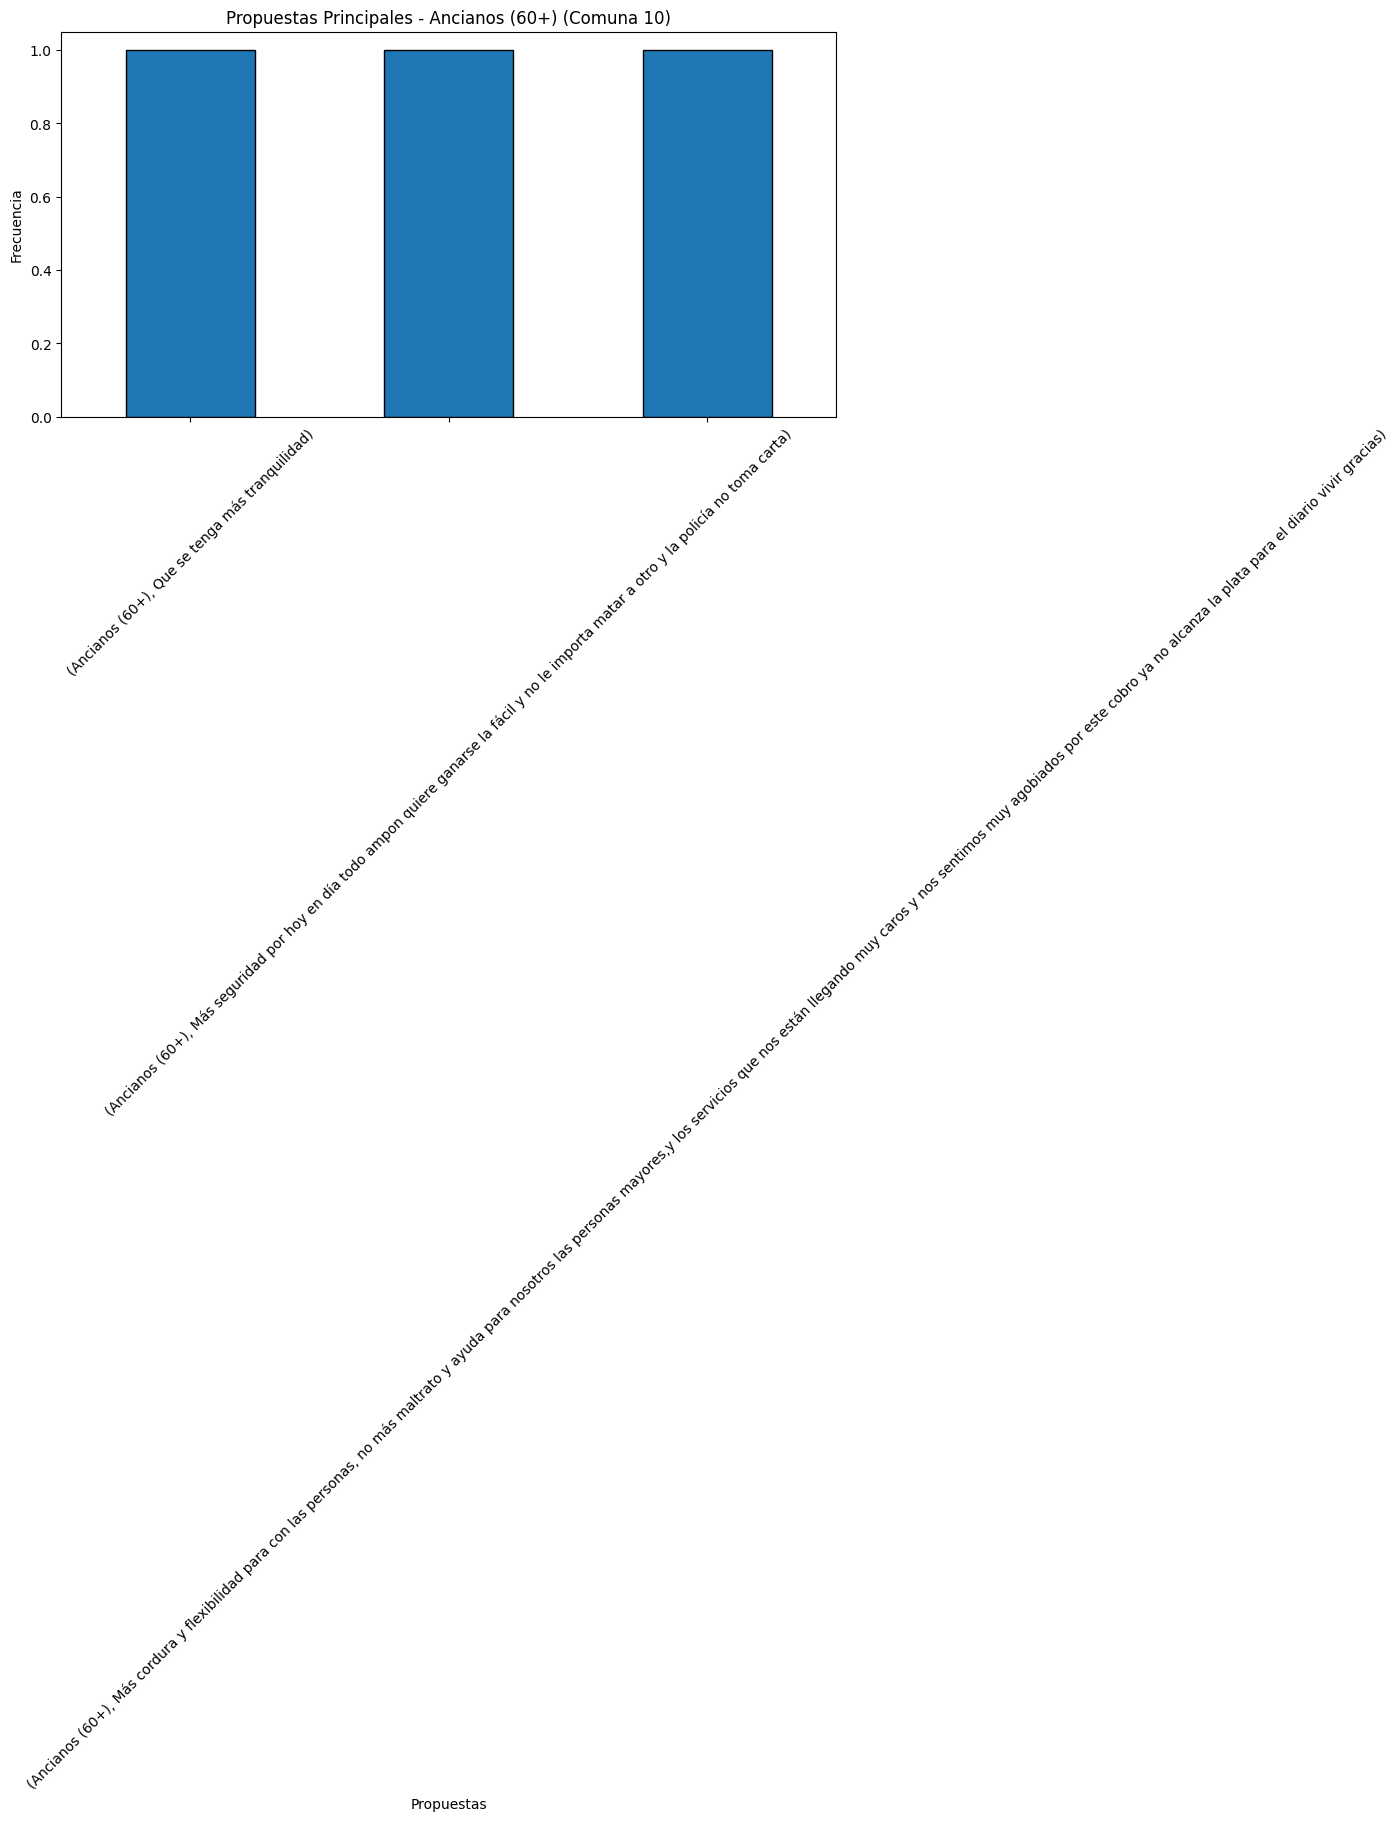

In [47]:
plot_proposals_by_age_group(data_comuna_7)

In [ ]:
import pandas as pd

# Filtrar por la comuna deseada
comuna_seleccionada = "Comuna 10"  # Cambia esto según la comuna deseada
data_filtered = data_cleaned[
    data_cleaned['Comuna'] == comuna_seleccionada
][[
    '<b>¿Qué aspecto cambiarías en Tuluá para mejorar tu bienestar y el de los demás?</b>',
    '¿En que barrio resides y que harías para mejorarlo?',
    'Comuna'
]]

# Guardar el archivo filtrado localmente en Colab
output_file_path = f"/content/{comuna_seleccionada.replace(' ', '_')}_filtered.xlsx"
data_filtered.to_excel(output_file_path, index=False)

# Descargar el archivo directamente desde Colab
from google.colab import files
files.download(output_file_path)

print(f"Archivo filtrado preparado para descarga: {output_file_path}")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Archivo filtrado preparado para descarga: /content/Comuna_10_filtered.xlsx


In [ ]:
from google.colab import files

# Guardar el DataFrame transformado a un archivo Excel
data_cleaned.to_csv('Comuna_1.csv', index=False)

# Descargar el archivo
files.download('Comuna_1.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files

# Guardar el DataFrame transformado a un archivo Excel
data_cleaned.to_csv('Respuestas_transformadas.csv', index=False)

# Descargar el archivo
files.download('Respuestas_transformadas.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>